Attention! I didn't have time to entirely automate this experiment. But it's very easy to exactly reproduce the results, just by manually setting some hyper-parameters as listed.

For different values of Rho (i.e., 0,0.5,0.99), the proper lmda's and gamma_p's should change. Just replace them from the lists provided.

In [1]:
import RRQ.VQs as VQs
import RRQ.Tools as Tools
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sparse_ternary_networks.Tools import SubbandPCA_whitner
from scipy.linalg import toeplitz
from scipy.linalg import eigh

In [2]:
N_test = 10000
#N_train = 1000
n = 1000
SType = 'AR1'
numRep = 2
# For Rho = 0.99 use:
#mList = [2,4,8,16,32,64,128,256,512,1024,2048]
# For Rho = 0 use:
mList = [256,512,1024,2048]
RhoList = [0]
#lmdaList = [1e5,1e2,1e-1]  # ATTENTION!  Put this manually for lmda, for each Rho
RateList = np.hstack(([0],np.array(np.log2(mList)/n)))

In [3]:
RateList

array([0.   , 0.008, 0.009, 0.01 , 0.011])

In [4]:
Dist_Kmeans1_train = np.zeros((len(RhoList),len(mList),numRep))
Dist_Kmeans1_test = np.zeros((len(RhoList),len(mList),numRep))
Dist_Kmeans2_train = np.zeros((len(RhoList),len(mList),numRep))
Dist_Kmeans2_test = np.zeros((len(RhoList),len(mList),numRep))
Dist_VRKmeans_train = np.zeros((len(RhoList),len(mList),numRep))
Dist_VRKmeans_test = np.zeros((len(RhoList),len(mList),numRep))
################################################################
for repInd in range(numRep):
    print('Repetition = ',repInd + 1)
    for mInd,m in enumerate(mList):
        print('# of centroids = ',m)
        for RhoInd,Rho in enumerate(RhoList):
            print('Rho = ',Rho)
            ###############################################
            # For rho = 0 use:
            N_train = np.min([np.max([2000,2*m]),5000])
            # For rho = 0.99 use:
            # N_train = np.min([np.max([200,2*m]),3000])
            F_train,F_test = Tools.data_generator(n,N_train,N_test,SType,SourceParam=Rho)
            norm_train = np.divide(np.linalg.norm(F_train) ** 2, np.prod(F_train.shape))
            norm_test = np.divide(np.linalg.norm(F_test) ** 2, np.prod(F_test.shape))
            ###############################################
            # K-means training (before possible whitening):
            Kmeans_train = VQs.VR_Kmeans(m, lmda=0, init_method='Data', num_iter=(10, 0))
            _, _, _ = Kmeans_train.run(F_train)
            Dist_Kmeans1_train[RhoInd,mInd,repInd] = Kmeans_train.distortion / norm_train
            print(' \n ............................... Train set distortion = ', Kmeans_train.distortion / norm_train)
            # K-means testing:
            Kmeans_test = VQs.VQ_unit(Kmeans_train.C)
            F_out, _, _ = Kmeans_test.run(F_test)
            Dist_Kmeans1_test[RhoInd,mInd,repInd] = Kmeans_test.distortion / norm_test
            print(' ................................... Test set distortion = ', Kmeans_test.distortion / norm_test)
            ######### Whitening:
            if SType in ['MNIST', 'AR1', 'CYale']:
                F_train, EigVecs, dim_means = SubbandPCA_whitner(F_train, numSB=1, EigVecs=None,
                                                                 dim_means=None)
                F_test, _, _ = SubbandPCA_whitner(F_test, numSB=1, EigVecs=EigVecs, dim_means=dim_means)
            ###############################################
            # K-means training (after possible whitening):
            del Kmeans_train
            del Kmeans_test
            Kmeans_train = VQs.VR_Kmeans(m, lmda=0, init_method='Data', num_iter=(10, 0))
            _, _, _ = Kmeans_train.run(F_train)
            Dist_Kmeans2_train[RhoInd,mInd,repInd] = Kmeans_train.distortion / norm_train
            print(' \n ................................... Train set distortion = ',
                  Kmeans_train.distortion / norm_train)
            # K-means testing:
            Kmeans_test = VQs.VQ_unit(Kmeans_train.C)
            F_out, _, _ = Kmeans_test.run(F_test)
            Dist_Kmeans2_test[RhoInd,mInd,repInd] = Kmeans_test.distortion / norm_test
            print(' ................................... Test set distortion = ', Kmeans_test.distortion / norm_test)
            ###############################################
            # VR-Kmeans training:
            VRKmeans_train = VQs.VR_Kmeans(m, lmda=1e5, init_method='Data', num_iter=(10, 8), eta=5e-1, gamma_p=0.0)
            _, _, _ = VRKmeans_train.run(F_train)
            Dist_VRKmeans_train[RhoInd,mInd,repInd] = VRKmeans_train.distortion / norm_train
            print(' \n .............................. Train set distortion = ',VRKmeans_train.distortion / norm_train)
            # VR-Kmeans testing:
            VRKmeans_test = VQs.VQ_unit(VRKmeans_train.C)
            F_out, _, _ = VRKmeans_test.run(F_test)
            Dist_VRKmeans_test[RhoInd,mInd,repInd] = VRKmeans_test.distortion / norm_test
            print(' ................................. Test set distortion = ', VRKmeans_test.distortion / norm_test)
            #         del VRKmeans_train
            #         del VRKmeans_test
            

Repetition =  1
# of centroids =  256
Rho =  0
 
 ............................... Train set distortion =  0.8543911012722608
 ................................... Test set distortion =  1.0052942580302238
 
 ................................... Train set distortion =  0.8542568888536698
 ................................... Test set distortion =  1.0040496461320543
 
 .............................. Train set distortion =  0.9681985590878847
 ................................. Test set distortion =  0.9970997942612277
# of centroids =  512
Rho =  0
 
 ............................... Train set distortion =  0.7208109456217541
 ................................... Test set distortion =  1.0090018640491232
 
 ................................... Train set distortion =  0.7202879409688042
 ................................... Test set distortion =  1.0104719788396515
 
 .............................. Train set distortion =  0.9508643745106209
 ................................. Test set distortion 

KeyboardInterrupt: 

In [ ]:
Dist_Kmeans1_train = np.hstack((np.ones((len(RhoList),1,numRep)),Dist_Kmeans1_train))
Dist_Kmeans1_test = np.hstack((np.ones((len(RhoList),1,numRep)),Dist_Kmeans1_test))
Dist_Kmeans2_train = np.hstack((np.ones((len(RhoList),1,numRep)),Dist_Kmeans2_train))
Dist_Kmeans2_test = np.hstack((np.ones((len(RhoList),1,numRep)),Dist_Kmeans2_test))
Dist_VRKmeans_train = np.hstack((np.ones((len(RhoList),1,numRep)),Dist_VRKmeans_train))
Dist_VRKmeans_test = np.hstack((np.ones((len(RhoList),1,numRep)),Dist_VRKmeans_test))

In [ ]:
plt.plot(RateList,np.mean(Dist_Kmeans1_train[0,:,:],axis=1))
plt.plot(RateList,np.mean(Dist_Kmeans1_test[0,:,:],axis=1))

plt.plot(RateList,np.mean(Dist_VRKmeans_train[0,:,:],axis=1))
plt.plot(RateList,np.mean(Dist_VRKmeans_test[0,:,:],axis=1))
plt.grid()

In [ ]:
curve_dict = {}
curve_dict['Rho2_D_R_Kmeans_train'] = (RateList,np.mean(Dist_Kmeans1_train[0,:,:],axis=1))
curve_dict['Rho2_D_R_Kmeans_test'] = (RateList,np.mean(Dist_Kmeans1_test[0,:,:],axis=1))
#
curve_dict['Rho2_D_R_VRKmeans_train'] = (RateList,np.mean(Dist_VRKmeans_train[0,:,:],axis=1))
curve_dict['Rho2_D_R_VRKmeans_test'] = (RateList,np.mean(Dist_VRKmeans_test[0,:,:],axis=1))
# ###
# curve_dict['Rho1_D_R_Kmeans_train'] = (RateList,np.mean(Dist_Kmeans1_train[1,:,:],axis=1))
# curve_dict['Rho1_D_R_Kmeans_test'] = (RateList,np.mean(Dist_Kmeans1_test[1,:,:],axis=1))
# #
# curve_dict['Rho1_D_R_VRKmeans_train'] = (RateList,np.mean(Dist_VRKmeans_train[1,:,:],axis=1))
# curve_dict['Rho1_D_R_VRKmeans_test'] = (RateList,np.mean(Dist_VRKmeans_test[1,:,:],axis=1))
# ###
# curve_dict['Rho2_D_R_Kmeans_train'] = (RateList,np.mean(Dist_Kmeans1_train[2,:,:],axis=1))
# curve_dict['Rho2_D_R_Kmeans_test'] = (RateList,np.mean(Dist_Kmeans1_test[2,:,:],axis=1))
# #
# curve_dict['Rho2_D_R_VRKmeans_train'] = (RateList,np.mean(Dist_VRKmeans_train[2,:,:],axis=1))
# curve_dict['Rho2_D_R_VRKmeans_test'] = (RateList,np.mean(Dist_VRKmeans_test[2,:,:],axis=1))

In [ ]:
RateList

Rho =  0


IndexError: index 1 is out of bounds for axis 0 with size 1

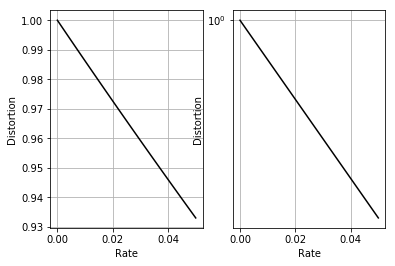

In [5]:
# SLB calculation for AR(1) sources:
RhoList = [0]
Rate_SLB= np.linspace(0,0.05,100)
Distortion_SLB = np.zeros((len(RhoList),len(Rate_SLB)))
for RhoInd,Rho in enumerate(RhoList):
    print('Rho = ',Rho)
   
    if Rho == 0:
        Distortion_SLB[RhoInd,:] = 2**(-2*Rate_SLB)
        continue
    cov_mat = toeplitz(Rho ** np.arange(n))
    EigValues, _ = eigh(cov_mat)
    for RateInd,Rate in enumerate(Rate_SLB):
        Distortion_SLB[RhoInd,RateInd] = np.sum(Tools.rev_WaterFiller(EigValues,Rate)[3])/n
        
        
#
plt.subplot(1,2,1)
plt.plot(Rate_SLB,Distortion_SLB[RhoInd,:],color='BLACK') 
plt.grid()
plt.xlabel('Rate')
plt.ylabel('Distortion')
#
plt.subplot(1,2,2)
plt.semilogy(Rate_SLB,Distortion_SLB[RhoInd,:],color='BLACK') 
plt.grid()
plt.xlabel('Rate')
plt.ylabel('Distortion')


curve_dict = {}
curve_dict['Rho0_SLB'] = (Rate_SLB,Distortion_SLB[0,:])
curve_dict['Rho1_SLB'] = (Rate_SLB,Distortion_SLB[1,:])
curve_dict['Rho2_SLB'] = (Rate_SLB,Distortion_SLB[2,:])

In [ ]:
plt.plot(RateList,np.mean(Dist_Kmeans1_test[0,:,:],axis=1))
plt.plot(RateList,np.mean(Dist_VRKmeans_test[0,:,:],axis=1))
plt.plot(Rate_SLB,Distortion_SLB[0,:])

In [7]:
# # # # Saving the results for PGFplott:
# PGF_path = '/home/sssohrab/Dropbox/Thesis/Thesis/Chapter5/Pics/PGF/VR-Kmeans/dat/'
# ExpName = 'RateLimit'
# # # # 
# for curve_name, curve_xy in curve_dict.items():
#     fname = ExpName + '_' + curve_name + '.dat'
#     print(fname)
#     x = curve_xy[0].astype(float).reshape(-1)
#     y = curve_xy[1].astype(float).reshape(-1)
#     np.savetxt(PGF_path + fname, np.transpose([x,y]), fmt='%8f', delimiter='   ')

RateLimit_Rho0_SLB.dat


In [ ]:
RateList

In [6]:
curve_dict

{'Rho0_SLB': (array([0.        , 0.00050505, 0.0010101 , 0.00151515, 0.0020202 ,
         0.00252525, 0.0030303 , 0.00353535, 0.0040404 , 0.00454545,
         0.00505051, 0.00555556, 0.00606061, 0.00656566, 0.00707071,
         0.00757576, 0.00808081, 0.00858586, 0.00909091, 0.00959596,
         0.01010101, 0.01060606, 0.01111111, 0.01161616, 0.01212121,
         0.01262626, 0.01313131, 0.01363636, 0.01414141, 0.01464646,
         0.01515152, 0.01565657, 0.01616162, 0.01666667, 0.01717172,
         0.01767677, 0.01818182, 0.01868687, 0.01919192, 0.01969697,
         0.02020202, 0.02070707, 0.02121212, 0.02171717, 0.02222222,
         0.02272727, 0.02323232, 0.02373737, 0.02424242, 0.02474747,
         0.02525253, 0.02575758, 0.02626263, 0.02676768, 0.02727273,
         0.02777778, 0.02828283, 0.02878788, 0.02929293, 0.02979798,
         0.03030303, 0.03080808, 0.03131313, 0.03181818, 0.03232323,
         0.03282828, 0.03333333, 0.03383838, 0.03434343, 0.03484848,
         0.03535354, 0